#### Loading Libraries

In [1]:
# for printing multiple outputs in a cell without print
from IPython.display import Image;from datetime import date
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
## calling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedKFold,RepeatedStratifiedKFold,RandomizedSearchCV
from sklearn.metrics import accuracy_score,auc,recall_score,precision_score,precision_recall_curve,confusion_matrix,\
ConfusionMatrixDisplay,classification_report,roc_auc_score,f1_score
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline,Pipeline
import seaborn as sns
sns.set(style="darkgrid") #white, dark, whitegrid, darkgrid, ticks

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Data cleaning and visualisation was done in excel and report was shared as well in phase 1.

#### Reading file

In [3]:
df = pd.read_excel('C:\\Users\\vishn\\Downloads\\niha_assignment\\vishnu\\ASM_Assignment1_Responses.xlsx', sheet_name='2.cleaned')
type(df) # type of dataframe
df.shape
df.head(3)

pandas.core.frame.DataFrame

(116, 21)

,sl_nbr,Gender,clnd_Working_City,Marriage status/ Kids,Annual Salary (in Indian Rupees),Please Mention your age in years,Work Experience (in years),clnd_Average Time to Commute to office one way (in minutes),clnd_Type of Industry,clnd_Job Profile,...,Employment Type,Flexibility in office Timings,Number of total paid leave (Paid + Sick),Working days in Week,day_hrs_per_week,clnd_Actual Work hours per week (in hours),Clnd_Designated work hours per week that a person is expected to work (In hours),Actual_work_hours_per_desogmated_work_hours,How is your Work-Life Balance,GTE_Fair_Worklife_balance
0,1,Male,Pune,Married and No Kids,35Lacs +,31,6,0.0,"Banking, Finance & Insurance",Technology,...,Permanent - Company Payroll,Semi-Fixed working hours,40,Mon to Fri or 5 days,5.0,55.0,45.0,1.222222,Good,1
1,2,Male,Mumbai,Un Married,15Lacs to 20Lacs,30,3,30.0,"Banking, Finance & Insurance",Others,...,Permanent - Company Payroll,Fixed working hours,21,Mon to Fri & Alternate Saturdays,5.5,54.0,45.0,1.200000,Fair,1
2,3,Male,Mumbai,Un Married,20Lacs to 25Lacs,28,3,90.0,"Banking, Finance & Insurance",Technology,...,Permanent - Company Payroll,Semi-Fixed working hours,22,Mon to Fri & Alternate Saturdays,5.5,60.0,45.0,1.333333,Good,1


In [4]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [5]:
df["How is your Work-Life Balance"].value_counts()
#gives count of each values in a column

How is your Work-Life Balance
Good         52
Fair         34
Excellent    14
Poor         10
Very Poor     6
Name: count, dtype: int64

In [6]:
df.rename(columns = {'GTE_Fair_Worklife_balance':"Good_Worklife"},inplace= True)# Renaming the column
#df.rename(columns = {'GTE_Fair_Worklife_balance':"Good_Worklife"},inplace= True)

#### Creating Target or independent Variable

In [7]:
df["Good_Worklife"] = np.where(df["How is your Work-Life Balance"].isin(['Excellent','Good','Fair']),1,0)
#  when worklife is good(excellent,good,fair) it is 1 and in very,poor its 0 
df["Good_Worklife"].value_counts()

Good_Worklife
1    100
0     16
Name: count, dtype: int64

In [8]:
type(df) # type tells if it is list, tuple, dictionary, series or dataframe.
type(df.dtypes)
#print(df.dtypes) # returns data type of all columns of pd (pandas) df.
# pandas series = numpy array
#df.index
#df.columns

pandas.core.frame.DataFrame

pandas.core.series.Series

In [9]:
#df["Annual Salary (in Indian Rupees)"].unique()
df['enc_salary'] = np.select([   
        df["Annual Salary (in Indian Rupees)"] == '0 to 5 Lacs', 
        df["Annual Salary (in Indian Rupees)"] == '5Lacs to 10Lacs',
        df["Annual Salary (in Indian Rupees)"] == '10Lacs to 15Lacs',
        df["Annual Salary (in Indian Rupees)"] == '15Lacs to 20Lacs',
        df["Annual Salary (in Indian Rupees)"] == '20Lacs to 25Lacs',
        df["Annual Salary (in Indian Rupees)"] == '25Lacs to 30Lacs',
        df["Annual Salary (in Indian Rupees)"] == '30Lacs to 35Lacs',
        df["Annual Salary (in Indian Rupees)"] == '35Lacs +' ], 
        [ 1,2,3,4,5,6,7,8], 
        default= -999 )
df.groupby(["enc_salary"])["enc_salary"].count()

enc_salary
1    23
2    34
3    22
4    15
5    10
6     4
7     2
8     6
Name: enc_salary, dtype: int64

In [10]:
df.head(1)

,sl_nbr,Gender,clnd_Working_City,Marriage status/ Kids,Annual Salary (in Indian Rupees),Please Mention your age in years,Work Experience (in years),clnd_Average Time to Commute to office one way (in minutes),clnd_Type of Industry,clnd_Job Profile,...,Flexibility in office Timings,Number of total paid leave (Paid + Sick),Working days in Week,day_hrs_per_week,clnd_Actual Work hours per week (in hours),Clnd_Designated work hours per week that a person is expected to work (In hours),Actual_work_hours_per_desogmated_work_hours,How is your Work-Life Balance,Good_Worklife,enc_salary
0,1,Male,Pune,Married and No Kids,35Lacs +,31,6,0.0,"Banking, Finance & Insurance",Technology,...,Semi-Fixed working hours,40,Mon to Fri or 5 days,5.0,55.0,45.0,1.222222,Good,1,8


In [11]:
df.columns

Index(['sl_nbr', 'Gender', 'clnd_Working_City', 'Marriage status/ Kids',
       'Annual Salary (in Indian Rupees)', 'Please Mention your age in years',
       'Work Experience (in years)',
       'clnd_Average Time to Commute to office one way (in minutes)',
       'clnd_Type of Industry ', 'clnd_Job Profile', 'Work Mode',
       'Employment Type', 'Flexibility in office Timings',
       'Number of total paid leave (Paid + Sick)', 'Working days in Week',
       'day_hrs_per_week', 'clnd_Actual Work hours per week (in hours)',
       'Clnd_Designated work hours per week that a person is expected to work (In hours)',
       'Actual_work_hours_per_desogmated_work_hours',
       'How is your Work-Life Balance', 'Good_Worklife', 'enc_salary'],
      dtype='object')

## MANOVA & MANCOVA

In [12]:
num_cols = list(df.select_dtypes(np.number).columns)
manova_cols = num_cols + ['Gender', 'Marriage status/ Kids','Work Mode','Employment Type']
df1 = df[manova_cols].drop(columns = ["sl_nbr"])
df1.columns = pd.Series(df1.columns).str.replace(" ","_").str.replace("("  ,"").str.replace(")","").str.replace("_+","").str.replace("/","")

In [13]:
' + '.join(df1.columns)

'Please_Mention_your_age_in_years + Work_Experience_in_years + clnd_Average_Time_to_Commute_to_office_one_way_in_minutes + Number_of_total_paid_leave_Paid_Sick + day_hrs_per_week + clnd_Actual_Work_hours_per_week_in_hours + Clnd_Designated_work_hours_per_week_that_a_person_is_expected_to_work_In_hours + Actual_work_hours_per_desogmated_work_hours + Good_Worklife + enc_salary + Gender + Marriage_status_Kids + Work_Mode + Employment_Type'

In [14]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

In [15]:
# Fit MANOVA model
maov = MANOVA.from_formula('''Please_Mention_your_age_in_years + Work_Experience_in_years + clnd_Average_Time_to_Commute_to_office_one_way_in_minutes + 
Number_of_total_paid_leave_Paid_Sick + day_hrs_per_week + clnd_Actual_Work_hours_per_week_in_hours + 
Clnd_Designated_work_hours_per_week_that_a_person_is_expected_to_work_In_hours + Actual_work_hours_per_desogmated_work_hours + enc_salary ~ 
Good_Worklife''', 
       data=df1)
result = maov.mv_test()

# Print the MANOVA results
print(result.summary())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept         Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda  0.0123 9.0000 106.0000 944.8306 0.0000
         Pillai's trace  0.9877 9.0000 106.0000 944.8306 0.0000
 Hotelling-Lawley trace 80.2215 9.0000 106.0000 944.8306 0.0000
    Roy's greatest root 80.2215 9.0000 106.0000 944.8306 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
       Good_Worklife      Value  Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda 0.6705 9.0000 106.0000  5.7887 0.0000
           Pillai's trace 0.3295 9.0000 106.0000  5.7887 0.

In [16]:
# Assuming df is your DataFrame
#manova_data = df[['Please Mention your age in years', 'write', 'math', 'prog']]

# Fit MANOVA model
macov = MANOVA.from_formula('''Please_Mention_your_age_in_years + Work_Experience_in_years + clnd_Average_Time_to_Commute_to_office_one_way_in_minutes + 
Number_of_total_paid_leave_Paid_Sick + day_hrs_per_week + clnd_Actual_Work_hours_per_week_in_hours + 
Clnd_Designated_work_hours_per_week_that_a_person_is_expected_to_work_In_hours + Actual_work_hours_per_desogmated_work_hours + enc_salary ~ 
Good_Worklife + Gender + Marriage_status_Kids + Work_Mode + Employment_Type''', 
       data=df1)
result2 = macov.mv_test()

# Print the MANOVA results
print(result2.summary())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0521 9.0000 98.0000 198.3017 0.0000
         Pillai's trace  0.9479 9.0000 98.0000 198.3017 0.0000
 Hotelling-Lawley trace 18.2114 9.0000 98.0000 198.3017 0.0000
    Roy's greatest root 18.2114 9.0000 98.0000 198.3017 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
           Gender         Value  Num DF  Den DF F Value Pr > F
--------------------------------------------------------------
            Wilks' lambda 0.8713 9.0000 98.0000  1.6085 0.1232
           Pillai's trace 0.1287 9.0000 98.0000  1.6085 0.1232
   Hotellin

## Structural Equation Modeling (SEM)

In [17]:
#df[features]
df1_ohe = 1*pd.get_dummies(df1, columns= df1.select_dtypes("object").columns)
df1_ohe.shape
df1_ohe.columns = pd.Series(df1_ohe.columns).str.replace(" ","_").str.replace("("  ,"").str.replace(")","").str.replace("_+","").str.replace("/","").str.replace("-","")
df1_ohe.columns

(116, 22)

Index(['Please_Mention_your_age_in_years', 'Work_Experience_in_years',
       'clnd_Average_Time_to_Commute_to_office_one_way_in_minutes',
       'Number_of_total_paid_leave_Paid_Sick', 'day_hrs_per_week',
       'clnd_Actual_Work_hours_per_week_in_hours',
       'Clnd_Designated_work_hours_per_week_that_a_person_is_expected_to_work_In_hours',
       'Actual_work_hours_per_desogmated_work_hours', 'Good_Worklife',
       'enc_salary', 'Gender_Female', 'Gender_Male',
       'Marriage_status_Kids_Married_and_No_Kids',
       'Marriage_status_Kids_Married_and_have_Kids',
       'Marriage_status_Kids_Un_Married', 'Work_Mode_Hybrid_WFH_WFO',
       'Work_Mode_Work_From_Home_WFH', 'Work_Mode_Work_From_Office_WFO',
       'Employment_Type_Contract_Basis', 'Employment_Type_Freelancing',
       'Employment_Type_Internship',
       'Employment_Type_Permanent__Company_Payroll'],
      dtype='object')

### Multivariate regression

In [18]:
fmla1 = "Good_Worklife,Gender_Male, Marriage_status_Kids_Married_and_have_Kids ~ Please_Mention_your_age_in_years + Work_Experience_in_years + clnd_Average_Time_to_Commute_to_office_one_way_in_minutes + Number_of_total_paid_leave_Paid_Sick + day_hrs_per_week + clnd_Actual_Work_hours_per_week_in_hours + Clnd_Designated_work_hours_per_week_that_a_person_is_expected_to_work_In_hours + Actual_work_hours_per_desogmated_work_hours + enc_salary"
print(fmla1) 

Good_Worklife,Gender_Male, Marriage_status_Kids_Married_and_have_Kids ~ Please_Mention_your_age_in_years + Work_Experience_in_years + clnd_Average_Time_to_Commute_to_office_one_way_in_minutes + Number_of_total_paid_leave_Paid_Sick + day_hrs_per_week + clnd_Actual_Work_hours_per_week_in_hours + Clnd_Designated_work_hours_per_week_that_a_person_is_expected_to_work_In_hours + Actual_work_hours_per_desogmated_work_hours + enc_salary


In [19]:
import semopy
model1 = semopy.Model(fmla1)
result1 = model1.fit(df1_ohe)
print(result1)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.053
Number of iterations: 35
Params: 0.010 0.000 0.000 0.003 -0.028 -0.017 0.011 -0.144 -0.017 -0.012 0.025 0.002 -0.003 -0.086 0.005 0.006 -0.034 0.020 0.016 0.040 0.001 0.001 0.010 -0.005 -0.007 0.029 -0.014 0.122 0.080 0.111


In [20]:
ins1 = model1.inspect()
ins1

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Good_Worklife,~,Please_Mention_your_age_in_years,0.009759,0.014573,0.669626,5.030964e-01
1,Good_Worklife,~,Work_Experience_in_years,0.000233,0.013662,0.017082,9.863711e-01
2,Good_Worklife,~,clnd_Average_Time_to_Commute_to_office_one_way...,0.000181,0.000804,0.225528,8.215683e-01
3,Good_Worklife,~,Number_of_total_paid_leave_Paid_Sick,0.002771,0.002385,1.161842,2.452996e-01
4,Good_Worklife,~,day_hrs_per_week,-0.027884,0.085895,-0.324633,7.454589e-01
5,Good_Worklife,~,clnd_Actual_Work_hours_per_week_in_hours,-0.016501,0.002963,-5.570026,2.547007e-08
6,Good_Worklife,~,Clnd_Designated_work_hours_per_week_that_a_per...,0.011117,0.003959,2.808449,4.978076e-03
7,Good_Worklife,~,Actual_work_hours_per_desogmated_work_hours,-0.144054,0.032741,-4.399839,1.083310e-05
8,Good_Worklife,~,enc_salary,-0.016858,0.018812,-0.896156,3.701696e-01
9,Gender_Male,~,Please_Mention_your_age_in_years,-0.011700,0.018046,-0.648361,5.167517e-01


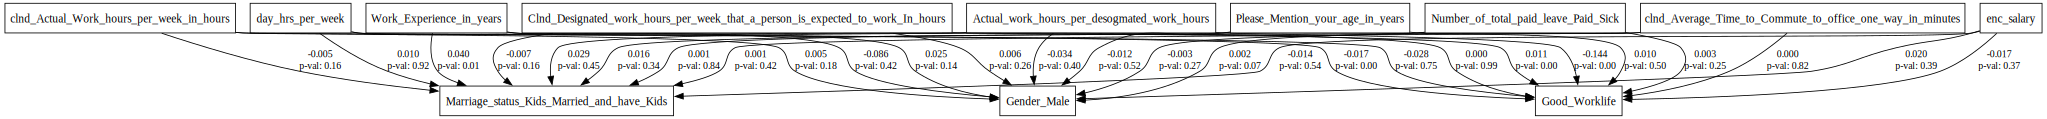

In [21]:
plot1 = semopy.semplot(model1, filename='sem_plot1.pdf')
plot1

### SEM Model

In [22]:
fmla2 = '''# measurement model
sem1 =~ Please_Mention_your_age_in_years + Work_Experience_in_years + clnd_Average_Time_to_Commute_to_office_one_way_in_minutes + Number_of_total_paid_leave_Paid_Sick + day_hrs_per_week + clnd_Actual_Work_hours_per_week_in_hours + Clnd_Designated_work_hours_per_week_that_a_person_is_expected_to_work_In_hours + Actual_work_hours_per_desogmated_work_hours + enc_salary
sem2 =~ Good_Worklife +  Gender_Female + Gender_Male + Marriage_status_Kids_Married_and_No_Kids + Marriage_status_Kids_Married_and_have_Kids + Marriage_status_Kids_Un_Married
sem3 =~ Work_Mode_Hybrid_WFH_WFO + Work_Mode_Work_From_Home_WFH + Work_Mode_Work_From_Office_WFO + Employment_Type_Contract_Basis + Employment_Type_Freelancing + Employment_Type_Internship + Employment_Type_Permanent__Company_Payroll
# regressions
sem2 ~ sem1
sem3 ~ sem1 + sem2
# residual correlations
Good_Worklife ~~ Work_Mode_Hybrid_WFH_WFO + Marriage_status_Kids_Married_and_have_Kids
Gender_Male ~~ Work_Mode_Work_From_Home_WFH + Employment_Type_Permanent__Company_Payroll 
Good_Worklife ~~ Marriage_status_Kids_Un_Married
Work_Mode_Hybrid_WFH_WFO ~~ Employment_Type_Internship
'''

In [23]:
model2 = semopy.Model(fmla2)
model2.fit(df1_ohe)
ins2 = model2.inspect()
ins2

SolverResult(fun=16.221867023407437, success=True, n_it=222, x=array([ 1.05481466e+00,  7.76463871e-01,  6.03511332e-01,  5.94706952e-03,
        3.51782114e-01,  1.74924088e-01,  3.65060581e-04,  1.71891760e-01,
       -1.68728337e+00,  1.46948768e+00,  3.39190587e+00,  6.10032246e+00,
       -9.58793551e+00, -1.48083743e-01, -8.49169386e-01,  5.79545354e-04,
        1.31913151e-02, -1.43888578e-02,  3.51751037e-03,  6.06887853e-03,
       -2.16292538e-03, -4.28308169e-01,  2.29786706e-03, -1.65400438e-02,
        1.93391348e-03,  1.16378768e-01, -1.77162916e-02,  6.95984907e-03,
        1.40746753e-01,  3.04978796e-03,  1.03385924e-15,  7.11636883e-01,
        5.91305677e+01,  7.15683561e-02,  1.69048590e-02,  2.51724349e-02,
        1.06123986e-01,  1.40522101e-01,  1.11444899e-01,  1.12746477e-01,
        0.00000000e+00,  1.29646428e+02,  2.05536410e+00,  1.81508087e+00,
        8.14434613e-02,  8.42127115e-02,  1.04835022e+02,  1.10015004e+03,
        1.15337997e-01,  2.50288636e+

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,sem2,~,sem1,6.068879e-03,0.005135,1.181767,0.237298
1,sem3,~,sem1,-2.162925e-03,0.010545,-0.205106,0.83749
2,sem3,~,sem2,-4.283082e-01,1.182463,-0.362217,0.71719
3,Please_Mention_your_age_in_years,~,sem1,1.000000e+00,-,-,-
4,Work_Experience_in_years,~,sem1,1.054815e+00,0.044466,23.722046,0.0
5,clnd_Average_Time_to_Commute_to_office_one_way...,~,sem1,7.764639e-01,0.55515,1.398655,0.161916
6,Number_of_total_paid_leave_Paid_Sick,~,sem1,6.035113e-01,0.191149,3.157289,0.001592
7,day_hrs_per_week,~,sem1,5.947070e-03,0.005682,1.046579,0.295294
8,clnd_Actual_Work_hours_per_week_in_hours,~,sem1,3.517821e-01,0.171516,2.05102,0.040265
9,Clnd_Designated_work_hours_per_week_that_a_per...,~,sem1,1.749241e-01,0.128698,1.359179,0.17409


In [24]:
#from semopy import semplot
plot2 = semopy.semplot(model2, filename='sem_plot2.pdf')
plot2

Error: Could not open "sem_plot2.pdf" for writing : Permission denied


CalledProcessError: Command '[WindowsPath('dot'), '-Kdot', '-Tpdf', '-O', 'sem_plot2']' returned non-zero exit status 1. [stderr: b'Error: Could not open "sem_plot2.pdf" for writing : Permission denied\r\n']

### The End